In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ex1data2.txt")
data.head()

,Size,no.of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Feature Normalize

In [4]:
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)
X_norm = np.subtract(X,mean)/std

In [5]:
theta = np.zeros((X.shape[1]+1,1))
m = X.shape[0]
#y = y.reshape(-1,1)

In [6]:
#Adding Intercept Term
X_norm = np.append(np.ones((m,1)),X_norm,axis=1)

### Cost Function

In [7]:
J = np.sum((np.matmul(X_norm,theta) - y)**2)/(2*m)
print("Cost when Theta=[0,0] is : {:.2f}".format(J))

def cost_fun(theta):
    J = np.sum((np.matmul(X_norm,theta) - y)**2)/(2*m)
    return J

Cost when Theta=[0,0] is : 3082802761003.50


### Gradient Discent

In [8]:
num_itr = 50
alpha = 0.1#Learning Rate
J_hist = np.zeros((num_itr,1))

for i in range(num_itr):
    for j in range(theta.shape[0]):
        cost = np.dot(np.transpose(X_norm[:,j]),(np.matmul(X_norm,theta) - y.reshape(-1,1)))/m
        theta[j] = theta[j] - (alpha*cost)
    J_hist[i] = cost_fun(theta)

In [9]:
print("Theta values after Gradient Discent :\n{}".format(theta))

Theta values after Gradient Discent :
[[338658.2492493 ]
 [103857.9363055 ]
 [ -1143.58125322]]


### Plotting Gradient Discent

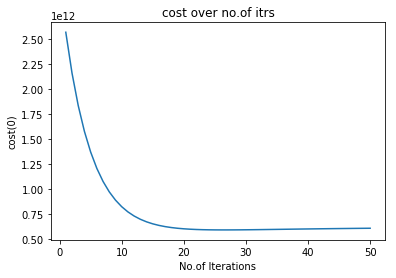

In [14]:
plt.plot(np.arange(1,num_itr+1).reshape(-1,1),J_hist)
plt.title("cost over no.of itrs")
plt.xlabel("No.of Iterations")
plt.ylabel("cost(0)")
plt.show()

### Prediction

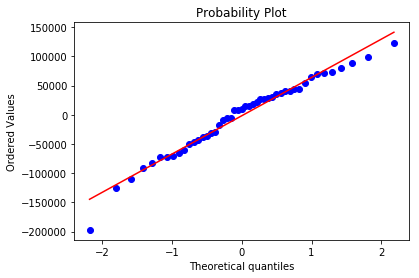

In [15]:
ypred = np.dot(X_norm,theta)

from scipy import stats as mystat
res = np.subtract(ypred[:,0],y)
mystat.probplot(res,plot=plt)
plt.show()

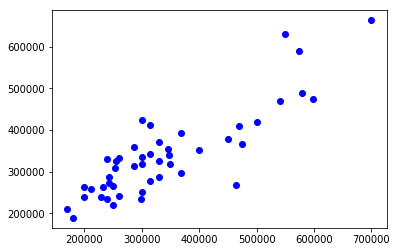

In [13]:
plt.scatter(y,ypred, color='b')
plt.show()